# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
sns.set_style('whitegrid')
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [4]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [5]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
Year='Year'
Avg_Temp='Global Average Temperature (°C)'
Carbon_dioxide='CO2 Concentration (ppm)'
Sea_level='Sea Level Rise (mm)'
Artic_Ice='Arctic Ice Area (million km²)'


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [7]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here
found_yearly_agg=df.groupby('Year').mean().reset_index()
found_yearly_agg

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691
...,...,...,...,...,...
119,2019,14.500105,348.642249,151.020415,9.014690
120,2020,14.496937,350.021731,150.219741,9.054254
121,2021,14.501424,350.150302,150.187456,8.968700
122,2022,14.495233,350.493023,148.857646,8.942012


## 2. Univariate Analysis

Analyze each climate variable independently.

In [9]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here
print(found_yearly_agg.describe())

              Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count   124.000000                       124.000000               124.000000   
mean   1961.500000                        14.499538               350.028626   
std      35.939764                         0.009960                 0.456535   
min    1900.000000                        14.474559               348.642249   
25%    1930.750000                        14.492782               349.691692   
50%    1961.500000                        14.499496               350.022334   
75%    1992.250000                        14.504872               350.367023   
max    2023.000000                        14.527762               351.003294   

       Sea Level Rise (mm)  Arctic Ice Area (million km²)  
count           124.000000                     124.000000  
mean            149.988859                       9.000886  
std               1.032095                       0.037547  
min             148.051748             

Visualization


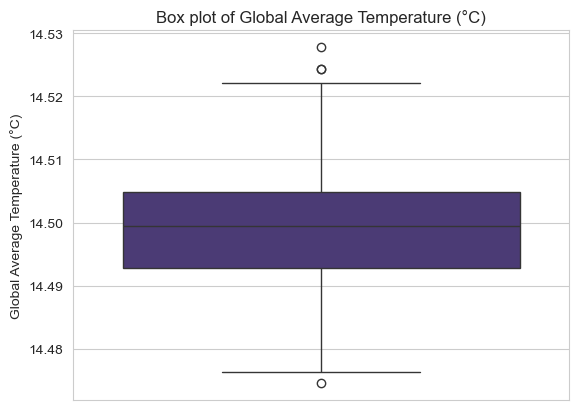

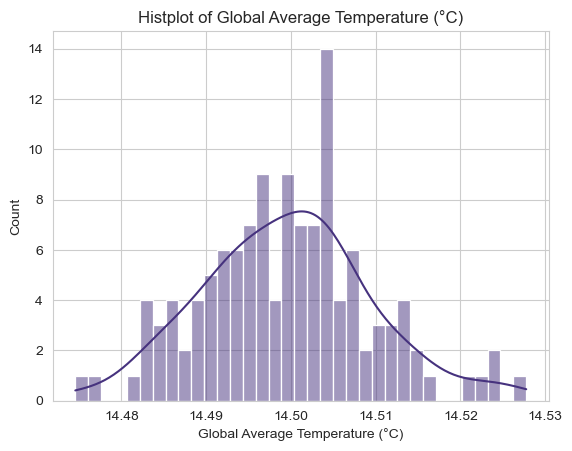

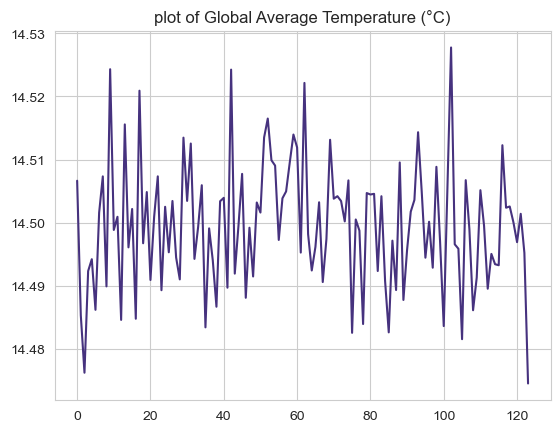

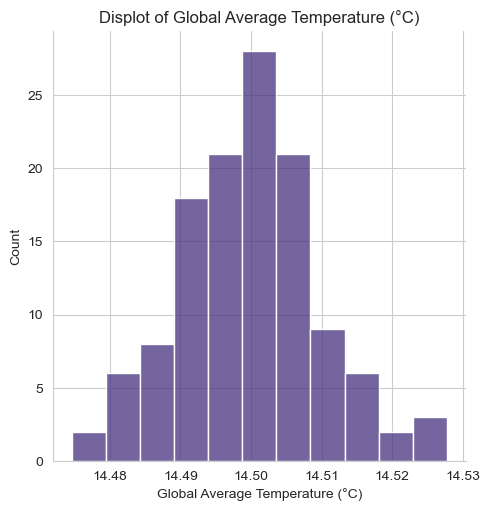

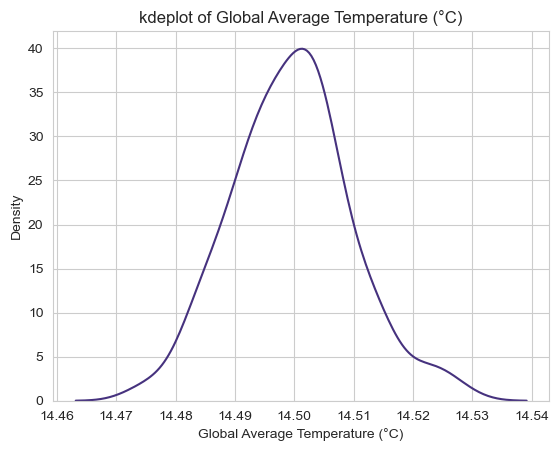

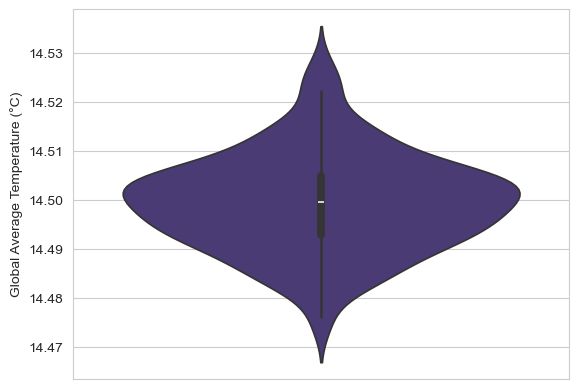

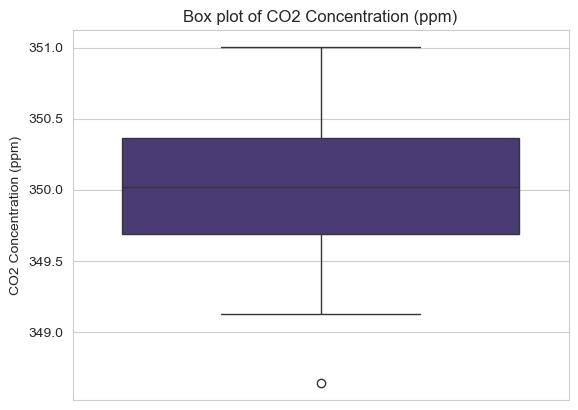

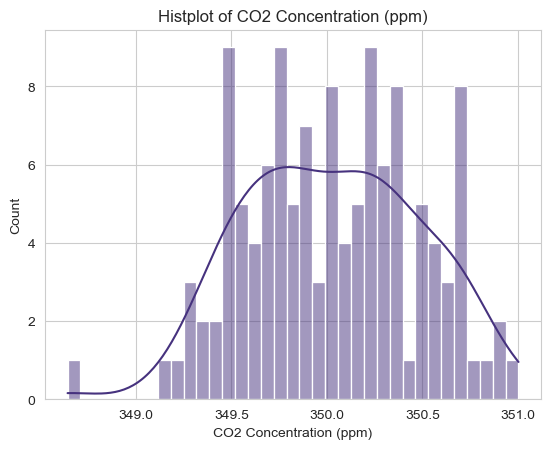

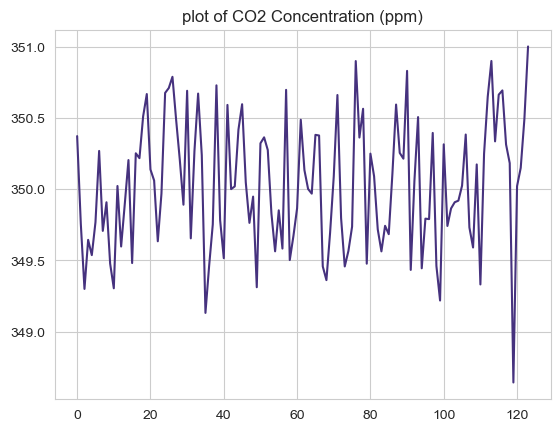

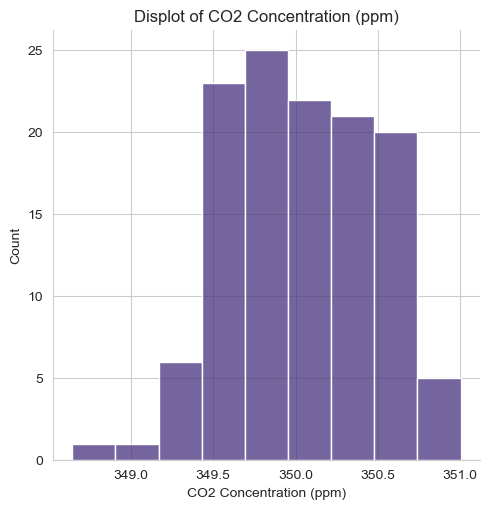

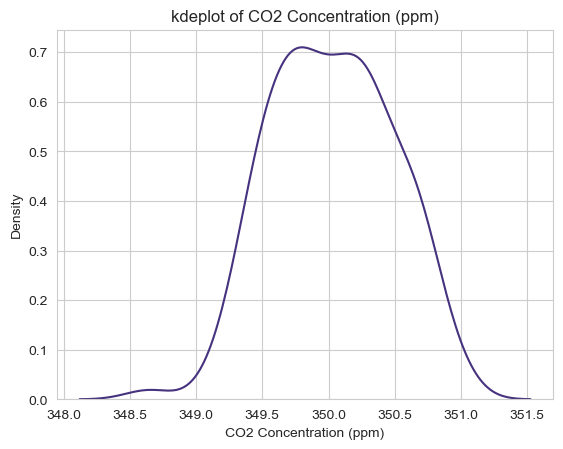

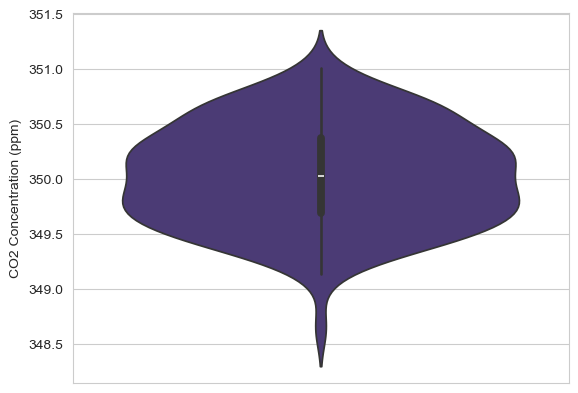

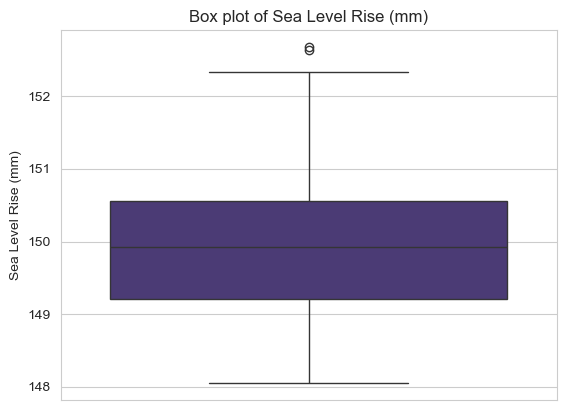

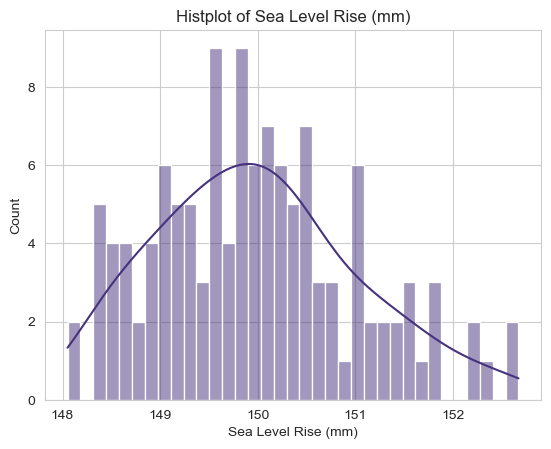

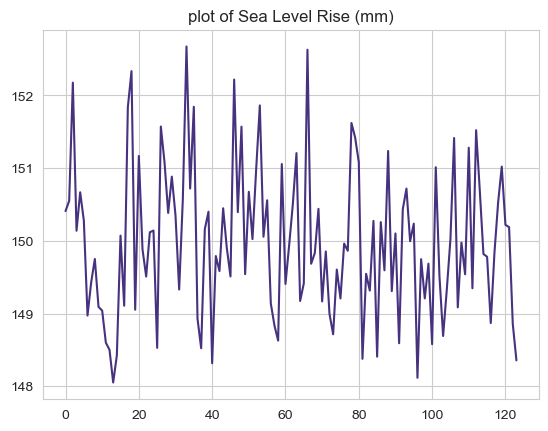

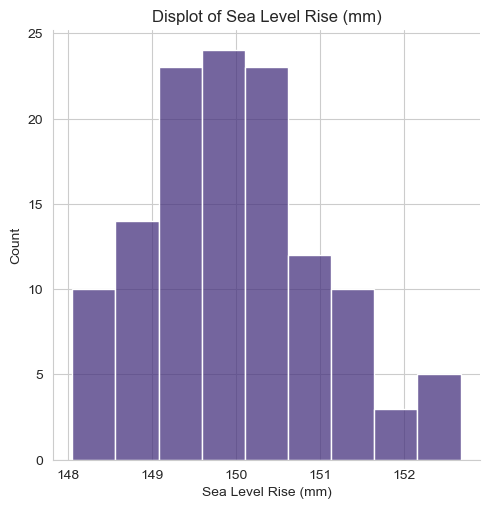

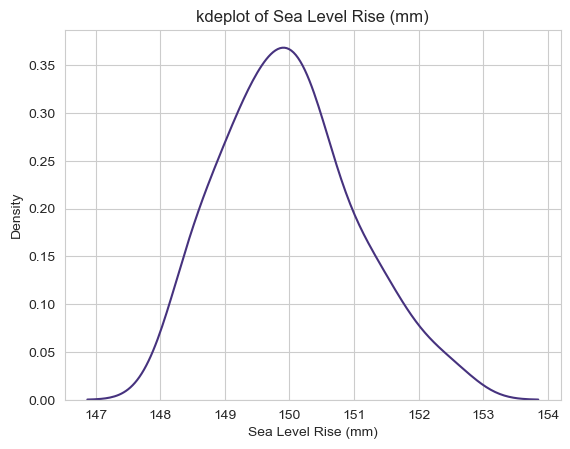

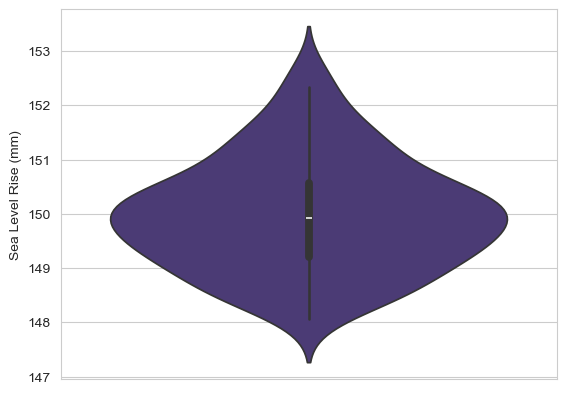

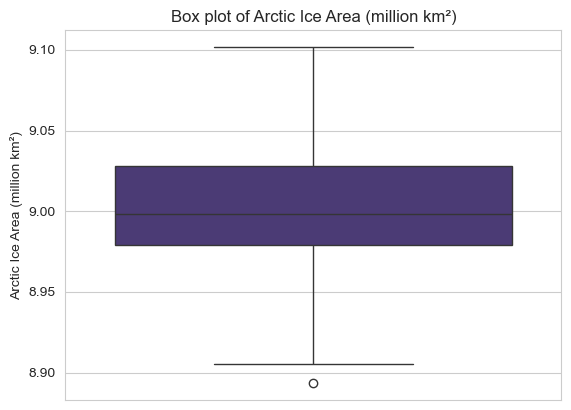

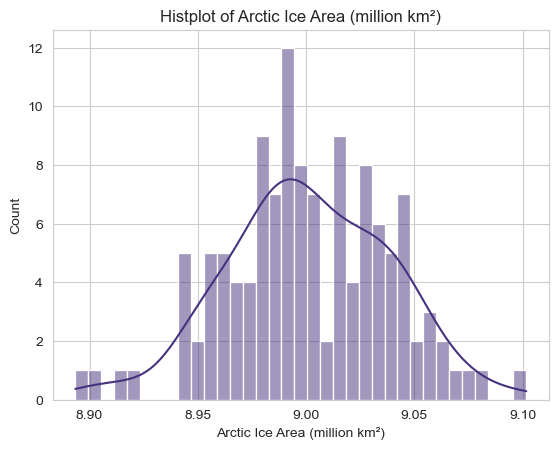

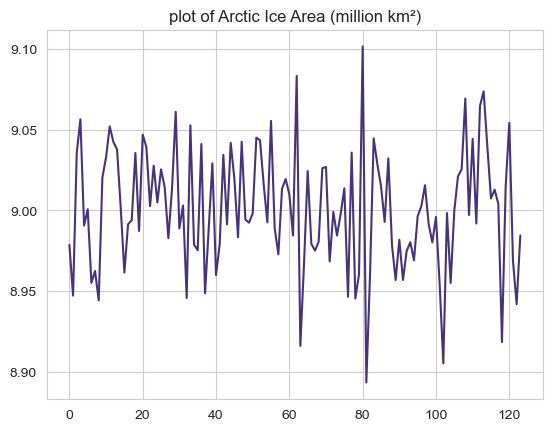

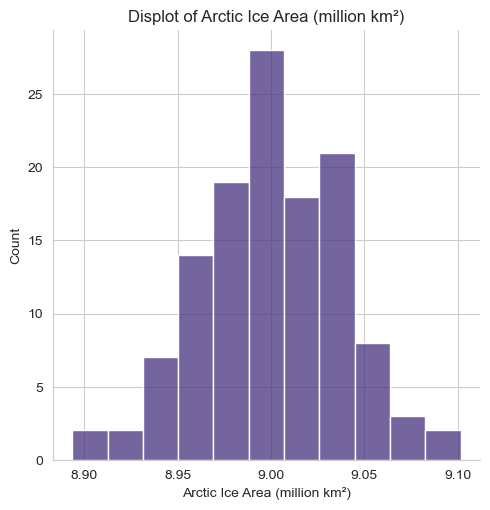

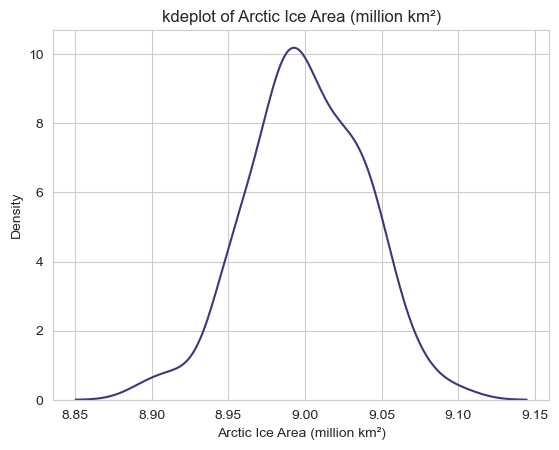

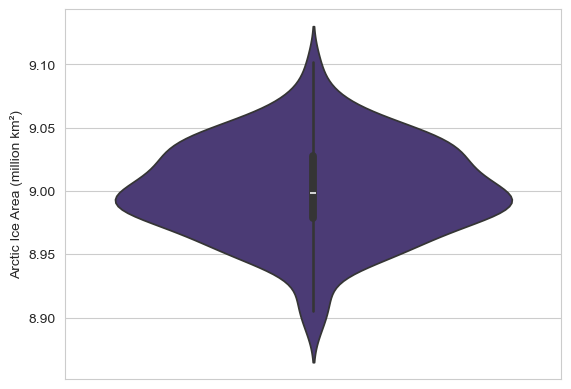

column :Global Average Temperature (°C)
column :CO2 Concentration (ppm)
column :Sea Level Rise (mm)
column :Arctic Ice Area (million km²)


In [17]:
print("Visualization")
univariate_vis_patterns=[]

for col in found_yearly_agg.columns[1:]:
    # Box Plot
    boxplot=sns.boxplot(found_yearly_agg[col])
    plt.title(f"Box plot of {col}")
    plt.show()
    #Histplot
    histplot=sns.histplot(data=found_yearly_agg[col],bins=35,kde=True)
    plt.title(f"Histplot of {col}")
    plt.show()
    #plot
    plot=plt.plot(found_yearly_agg[col])
    plt.title(f"plot of {col}")
    plt.show()
    #Displot
    displot=sns.displot(found_yearly_agg[col])
    plt.title(f"Displot of {col}")
    plt.show()
    #Kdeplot
    kdeplot=sns.kdeplot(found_yearly_agg[col])
    plt.title(f"kdeplot of {col}")
    plt.show()
    #violinplot
    violinplot=sns.violinplot(found_yearly_agg[col])
    plt.show()
    
    univariate_vis_patterns.append(col)
    
for pattern in univariate_vis_patterns:
    print(f"column :{pattern}")



## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

In [19]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here
corr_patterns=found_yearly_agg.corr()
corr_patterns

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
Year,1.000000,-0.044397,0.082761,-0.081506,-0.082203
Global Average Temperature (°C),-0.044397,1.000000,-0.067980,0.003878,0.047027
CO2 Concentration (ppm),0.082761,-0.067980,1.000000,0.098212,0.009986
Sea Level Rise (mm),-0.081506,0.003878,0.098212,1.000000,0.129528
Arctic Ice Area (million km²),-0.082203,0.047027,0.009986,0.129528,1.000000


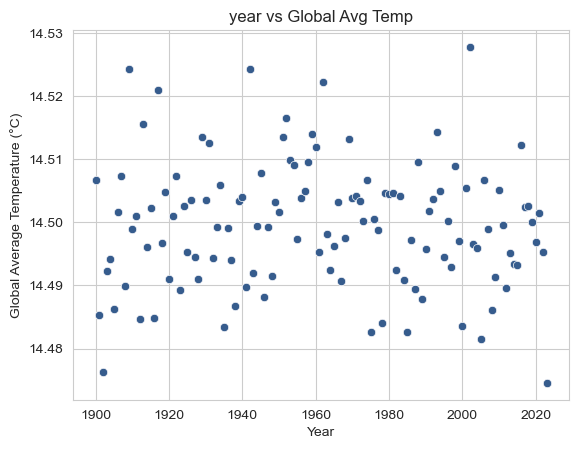

In [23]:
# Scatter Plot
# Year vs Global Average Temperature (°C)
sns.scatterplot(x='Year',y='Global Average Temperature (°C)',data=found_yearly_agg)
plt.title('year vs Global Avg Temp')
plt.show()


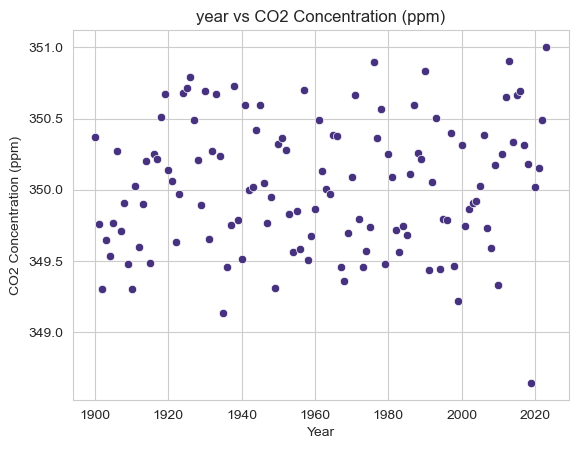

In [24]:
# Year vs CO2 Concentration (ppm)
sns.scatterplot(x='Year',y='CO2 Concentration (ppm)',data=found_yearly_agg)
plt.title('year vs CO2 Concentration (ppm)')
plt.show()


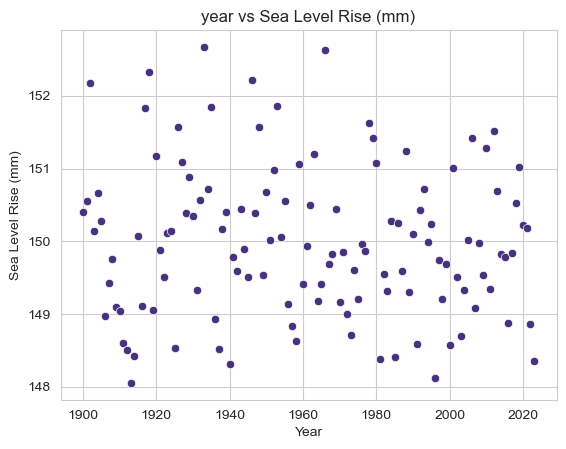

In [25]:
# Year vs Sea Level Rise (mm)
sns.scatterplot(x='Year',y='Sea Level Rise (mm)',data=found_yearly_agg)
plt.title('year vs Sea Level Rise (mm)')
plt.show()

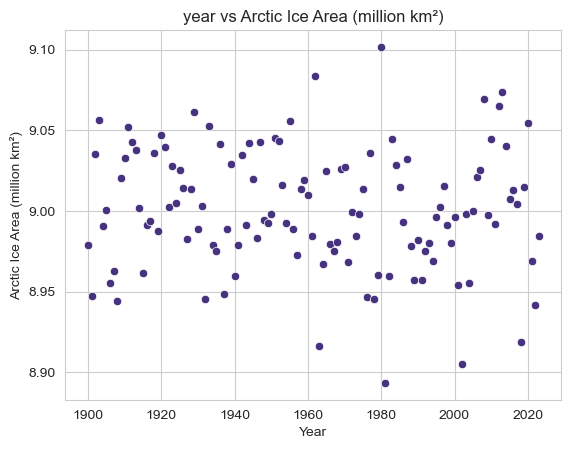

In [26]:
# Year vs Arctic Ice Area (million km²)
sns.scatterplot(x='Year',y='Arctic Ice Area (million km²)',data=found_yearly_agg)
plt.title('year vs Arctic Ice Area (million km²)')
plt.show()

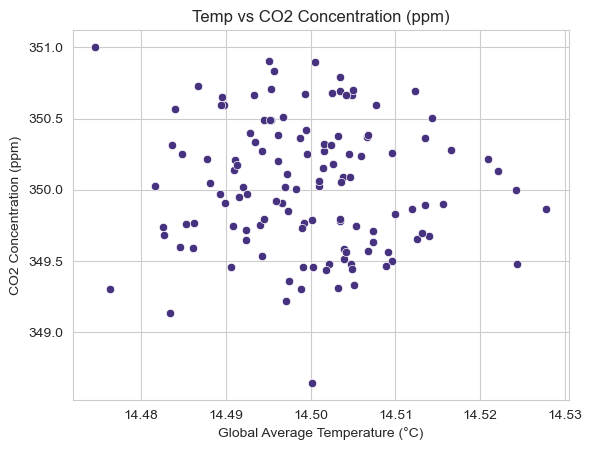

In [28]:
# Global Avg Temp vs CO2 Concentration (ppm)
sns.scatterplot(x='Global Average Temperature (°C)',y='CO2 Concentration (ppm)',data=found_yearly_agg)
plt.title('Temp vs CO2 Concentration (ppm)')
plt.show()

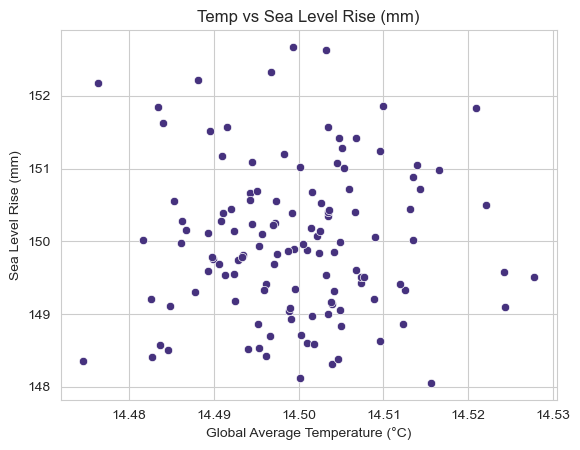

In [29]:
# Global Avg Temp vs Sea Level Rise (mm)
sns.scatterplot(x='Global Average Temperature (°C)',y='Sea Level Rise (mm)',data=found_yearly_agg)
plt.title('Temp vs Sea Level Rise (mm)')
plt.show()

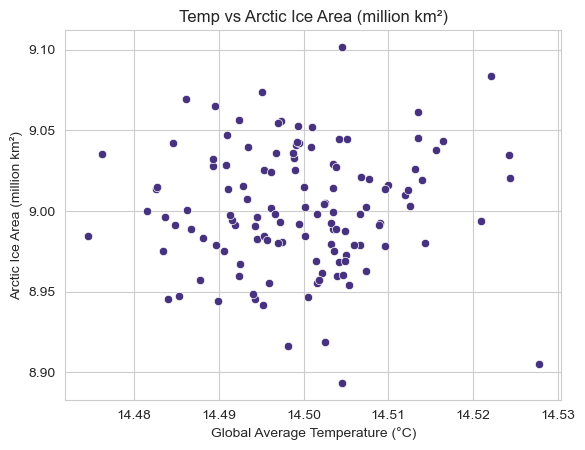

In [30]:
# Global Avg Temp vs Arctic Ice Area (million km²)
sns.scatterplot(x='Global Average Temperature (°C)',y='Arctic Ice Area (million km²)',data=found_yearly_agg)
plt.title('Temp vs Arctic Ice Area (million km²)')
plt.show()

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

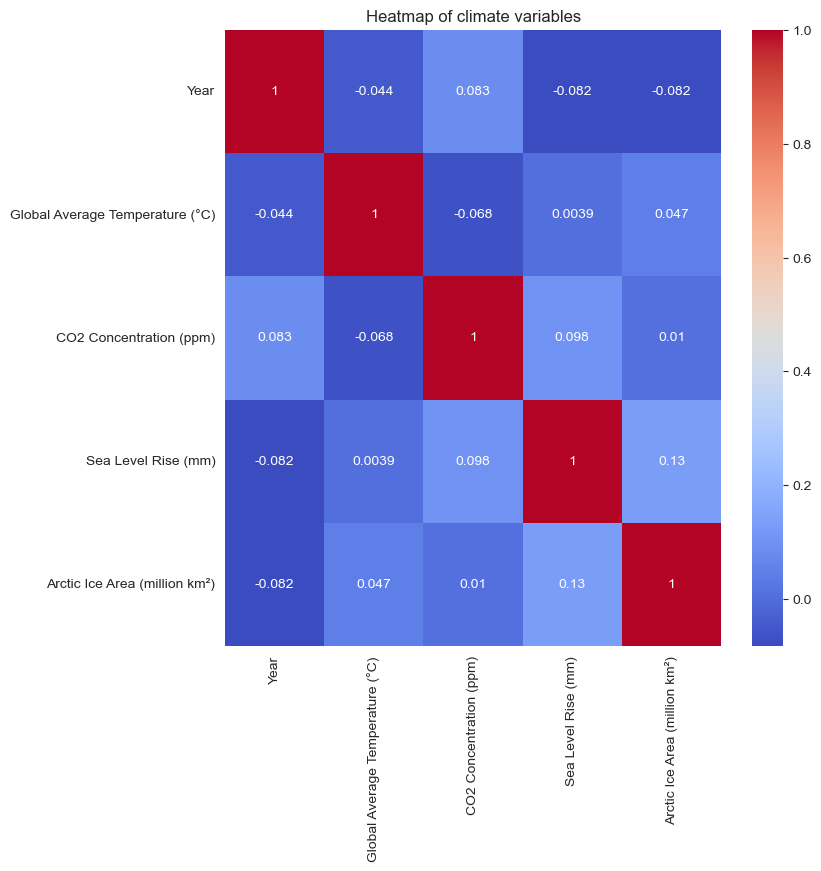

In [35]:
# Heat map
plt.figure(figsize=(8,8))
sns.heatmap(corr_patterns,annot=True,cmap='coolwarm')
plt.title('Heatmap of climate variables')
plt.show()

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

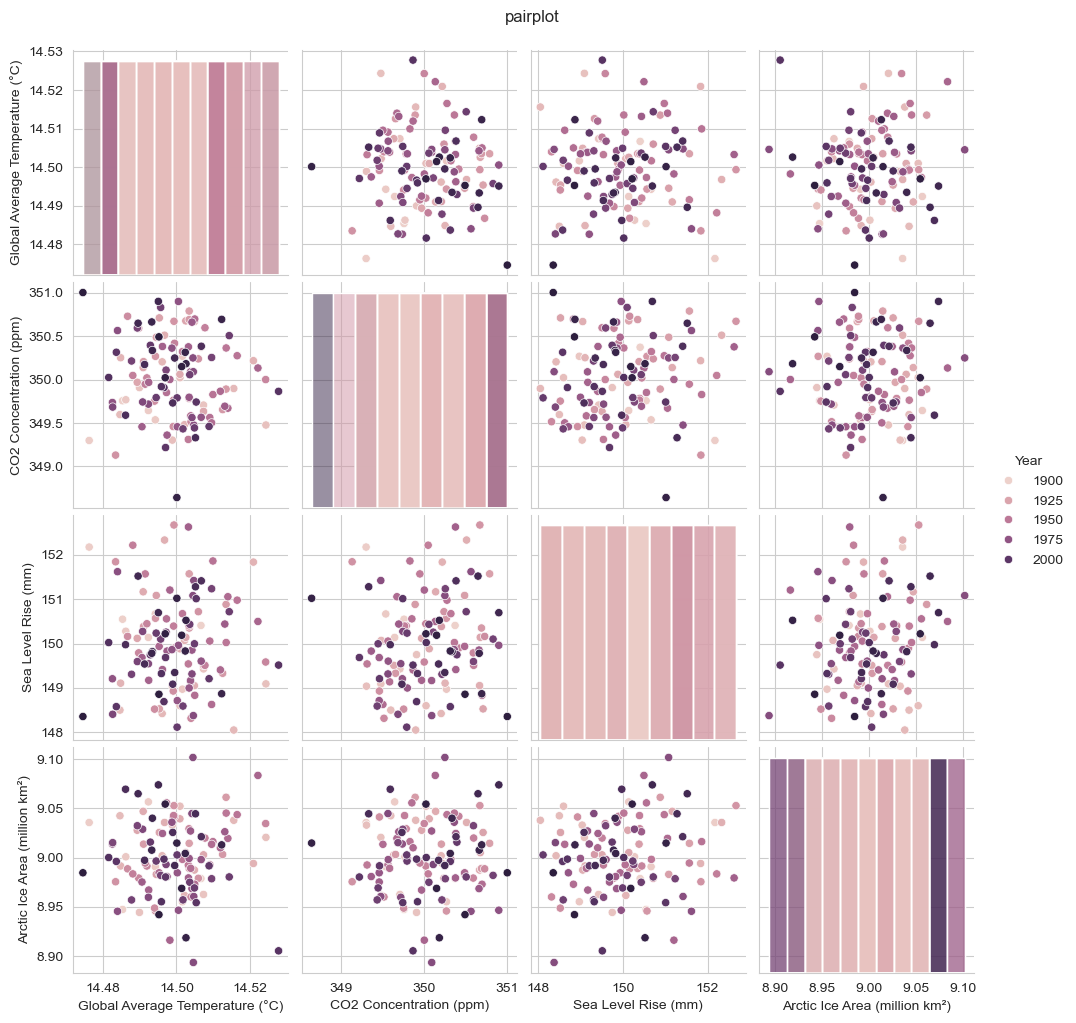

In [66]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here
# Pairplot
sns.pairplot(found_yearly_agg,hue='Year',diag_kind='hist')
plt.suptitle('pairplot',y=1.02)
plt.show()

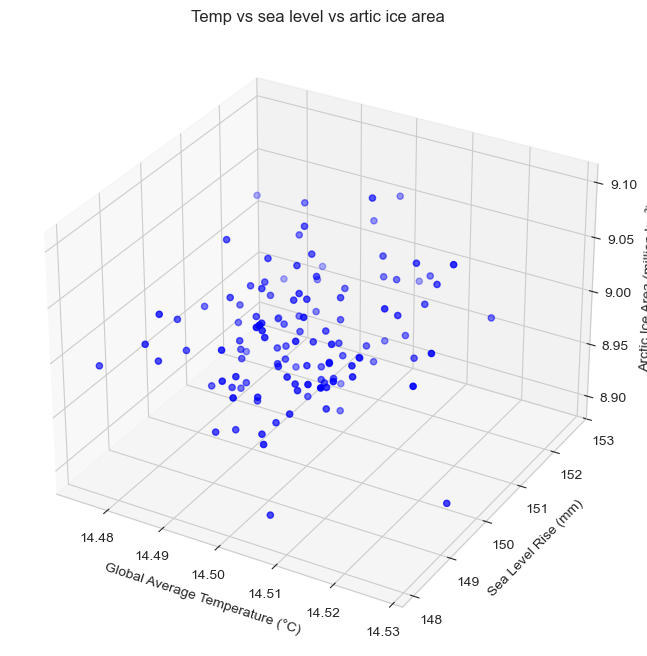

In [67]:
# 3D plots
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(found_yearly_agg['Global Average Temperature (°C)'],found_yearly_agg['Sea Level Rise (mm)'],found_yearly_agg['Arctic Ice Area (million km²)'],c='blue',marker='o')
ax.set_xlabel('Global Average Temperature (°C)')
ax.set_ylabel('Sea Level Rise (mm)')
ax.set_zlabel('Arctic Ice Area (million km²)')
ax.set_title('Temp vs sea level vs artic ice area')
plt.show()

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here
## 1. Global Average Temperature:

It has generally decreased over the years, with notable rapid declines recently.

## 2.CO2 Concentration:

There's been a steady increase in CO2 levels, indicating significant human impact.

## 3.Sea Level Rise:

Sea levels have mostly decreased, which is unexpected given global warming trends.

## 4.Arctic Ice Area:

The Arctic ice area has consistently shrunk over the years.
# Insights
## 1. Correlation Analysis:

A weak negative correlation exists between global average temperature and CO2 concentration, sea level rise, and Arctic ice area, suggesting other influencing factors.

## 2.Bivariate Analysis:

Scatter plots and regression lines illustrate the relationships between variables, highlighting the interconnectedness of climate factors.

## 3.Multivariate Analysis:

Pair plots and 3D scatter plots provide an overview of variable relationships, with decade-based coloring and 3D perspectives revealing detailed interactions.

# implications

Unexpected trends in CO₂ levels might be due to anomalies or external factors. There is a negative association between temperature and CO₂. Sea levels are decreasing, which is contrary to expected outcomes. This suggests that climate change is driven by multiple interrelated factors rather than straightforward cause-and-effect interactions.


